# Unveiling Human Emotions through Advanced Deep Learning Techniques

In [1]:
#import paskages
import os
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from keras.utils import plot_model


In [2]:
#Load datatset
train_data_path = 'dataset/train/'
test_data_path  = 'dataset/test/'

In [3]:
# Count examples in each class
train_counts = {}
test_counts = {}
for expression in os.listdir(train_data_path):
    expression_path = os.path.join(train_data_path, expression)
    train_counts[expression] = len(os.listdir(expression_path))

for expression in os.listdir(test_data_path):
    expression_path = os.path.join(test_data_path, expression)
    test_counts[expression] = len(os.listdir(expression_path))

In [4]:
# counts of examples in train data and test sets
train_counts_df = pd.DataFrame(train_counts, index=['train'])
test_counts_df = pd.DataFrame(test_counts, index=['test'])
print(train_counts_df)
print()

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171



In [5]:
train_counts_df

,angry,disgust,fear,happy,neutral,sad,surprise
train,3995,436,4097,7215,4965,4830,3171


In [6]:

test_counts_df

,angry,disgust,fear,happy,neutral,sad,surprise
test,958,111,1024,1774,1233,1247,831


<AxesSubplot:>

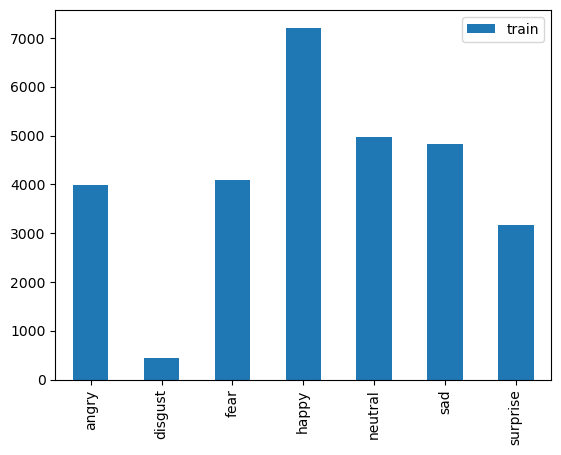

In [7]:
# Plot the number of images in the training set
train_counts_df.transpose().plot(kind='bar')

<AxesSubplot:>

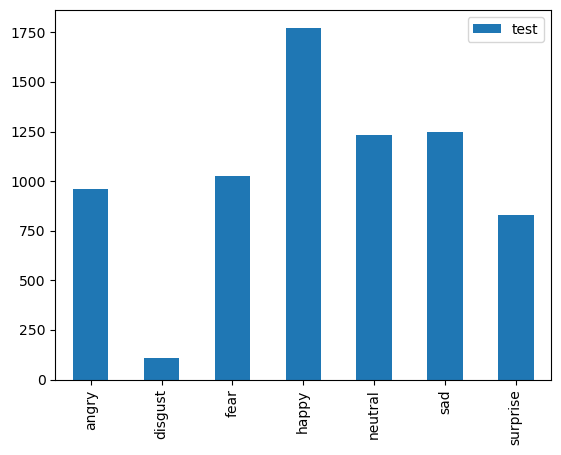

In [8]:
# Plot the number of images in the test set
test_counts_df.transpose().plot(kind='bar')

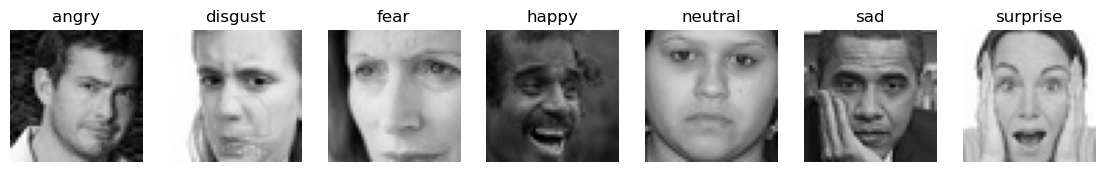

In [9]:
plt.figure(figsize=(14, 22))
for i, expression in enumerate(os.listdir(train_data_path), 1):
    img_path = os.path.join(train_data_path, expression, os.listdir(os.path.join(train_data_path, expression))[1])
    img = load_img(img_path)
    plt.subplot(1, 7, i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
plt.show()


In [10]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, horizontal_flip=True)
# Create training set
training_set = train_datagen.flow_from_directory(
    train_data_path,
    batch_size=64, 
    target_size=(48, 48),
    shuffle=True, 
    color_mode='grayscale', 
    class_mode='categorical')


Found 28709 images belonging to 7 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_data_path,
    batch_size=64, 
    target_size=(48, 48),
    shuffle=True, 
    color_mode='grayscale',
    class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [12]:
# Display class indices
print(training_set.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [15]:
###########################

In [16]:
# Define the model creation function

def create_model(input_size, num_classes):
    model = tf.keras.Sequential()
    
    # Convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_size))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [17]:
# Create and display the model
new_model = create_model((48, 48, 1), 7)
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_5 (Bat  (None, 23, 23, 32)        128       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 23, 23, 32)        1056      
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)       

In [18]:
plot_model(new_model, to_file='model_steps.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:


path_model = 'model_detect_emotional.h5'
dir_log = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=path_model,
                             save_best_only=True,
                             verbose=1,
                             monitor='val_loss')  

stop_early = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=10, 
                          verbose=1, 
                          restore_best_weights=True)  

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=10, 
                              verbose=1, 
                              min_delta=0.00001)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=dir_log, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger, tensorboard_callback, stop_early]

## Training Model


In [20]:
step_epoch = training_set.n // training_set.batch_size
validat_steps = test_set.n // test_set.batch_size

hist = new_model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=100,
                 callbacks=callbacks,
                 steps_per_epoch=step_epoch,
                 validation_steps=validat_steps)

Epoch 1/100
448/448 [==============================] - ETA: 0s - loss: 2.3076 - accuracy: 0.1963
Epoch 1: val_loss improved from inf to 1.99070, saving model to model_detect_emotional.h5


C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


448/448 [==============================] - 642s 1s/step - loss: 2.3076 - accuracy: 0.1963 - val_loss: 1.9907 - val_accuracy: 0.2497 - lr: 1.0000e-04
Epoch 2/100
448/448 [==============================] - ETA: 0s - loss: 2.0245 - accuracy: 0.2409
Epoch 2: val_loss improved from 1.99070 to 1.74217, saving model to model_detect_emotional.h5
448/448 [==============================] - 200s 446ms/step - loss: 2.0245 - accuracy: 0.2409 - val_loss: 1.7422 - val_accuracy: 0.3079 - lr: 1.0000e-04
Epoch 3/100
448/448 [==============================] - ETA: 0s - loss: 1.9085 - accuracy: 0.2741
Epoch 3: val_loss improved from 1.74217 to 1.68291, saving model to model_detect_emotional.h5
448/448 [==============================] - 204s 455ms/step - loss: 1.9085 - accuracy: 0.2741 - val_loss: 1.6829 - val_accuracy: 0.3411 - lr: 1.0000e-04
Epoch 4/100
448/448 [==============================] - ETA: 0s - loss: 1.8479 - accuracy: 0.2915
Epoch 4: val_loss improved from 1.68291 to 1.61834, saving model to 

448/448 [==============================] - 151s 337ms/step - loss: 0.9878 - accuracy: 0.6252 - val_loss: 1.0273 - val_accuracy: 0.6200 - lr: 1.0000e-04
Epoch 52/100
448/448 [==============================] - ETA: 0s - loss: 0.9744 - accuracy: 0.6281
Epoch 52: val_loss did not improve from 1.02726
448/448 [==============================] - 149s 332ms/step - loss: 0.9744 - accuracy: 0.6281 - val_loss: 1.0345 - val_accuracy: 0.6129 - lr: 1.0000e-04
Epoch 53/100
448/448 [==============================] - ETA: 0s - loss: 0.9740 - accuracy: 0.6308
Epoch 53: val_loss improved from 1.02726 to 1.02306, saving model to model_detect_emotional.h5
448/448 [==============================] - 148s 331ms/step - loss: 0.9740 - accuracy: 0.6308 - val_loss: 1.0231 - val_accuracy: 0.6205 - lr: 1.0000e-04
Epoch 54/100
448/448 [==============================] - ETA: 0s - loss: 0.9663 - accuracy: 0.6352
Epoch 54: val_loss improved from 1.02306 to 1.01906, saving model to model_detect_emotional.h5
448/448 [===

Epoch 77: early stopping


In [28]:
# Evaluate the trained model on the test set
evaluation = new_model.evaluate(test_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

113/113 [==============================] - 8s 73ms/step - loss: 1.0054 - accuracy: 0.6421
Test Accuracy: 64.21%


In [29]:
# Create confusion matrix
y_pred = new_model.predict(test_set)
y_true = test_set.classes
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)

113/113 [==============================] - 4s 39ms/step


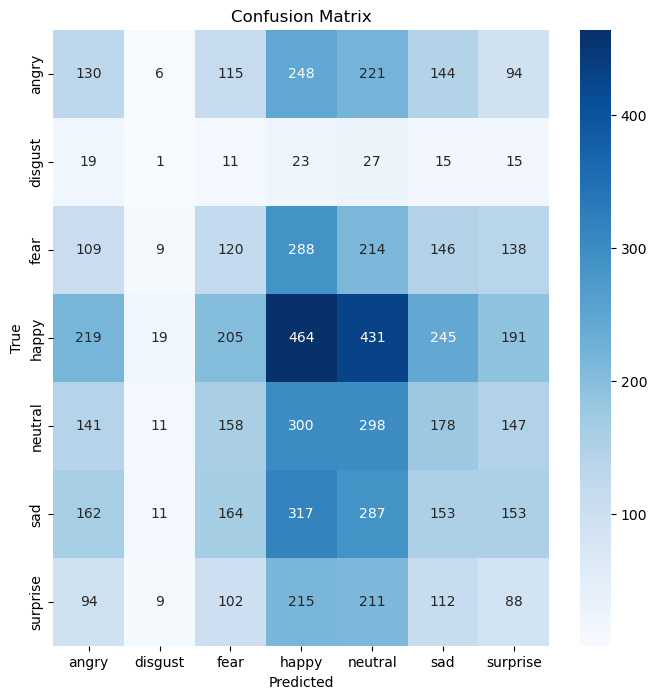

In [30]:
# Visualize confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [32]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys()))

Classification Report:
               precision    recall  f1-score   support

       angry       0.15      0.14      0.14       958
     disgust       0.02      0.01      0.01       111
        fear       0.14      0.12      0.13      1024
       happy       0.25      0.26      0.26      1774
     neutral       0.18      0.24      0.20      1233
         sad       0.15      0.12      0.14      1247
    surprise       0.11      0.11      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



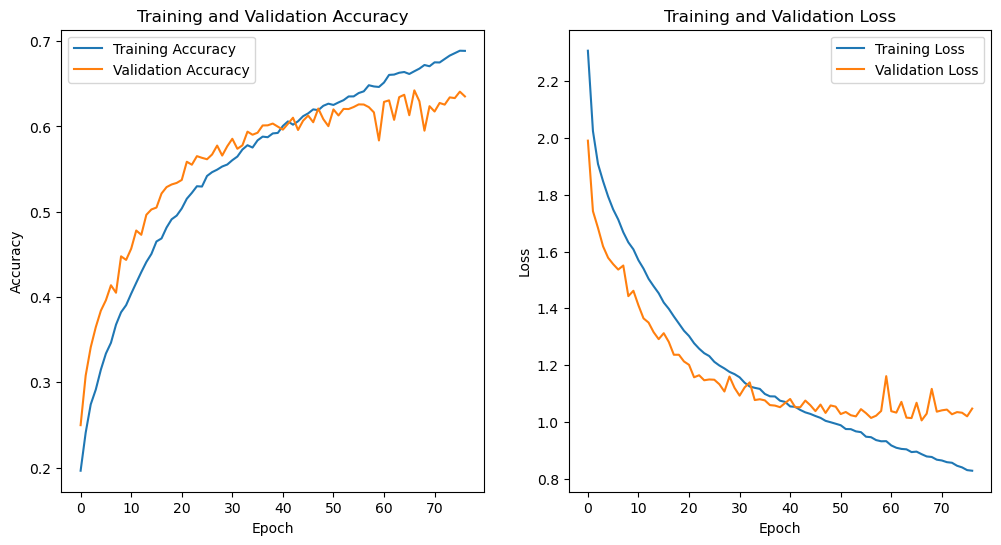

In [33]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()